Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 12. | 
[Introduction to Scikit-Learn](./01-Introduction-To-Scikit-Learn.ipynb) | [Support Vector Machines](./02-Support-Vector-Machines.ipynb) | [Decision Trees and Random Forests](./03-Random-Forests.ipynb) | [Feature Engineering](./06_feature-engineering.ipynb)

- - -

[Tutorials](./04-Tutorials.ipynb)

- - -

[Exercises](./05-Exercises.ipynb)

# [Tutorials](https://scikit-learn.org/stable/tutorial/index.html)

## Machine learning: the problem setting

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Learning problems fall into a few categories:

- **supervised learning**, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

  - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

  - regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- **unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

## Loading an example dataset

```scikit-learn``` comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression.

In the following, we start a Python interpreter from our shell and then load the iris and digits datasets. Our notational convention is that $ denotes the shell prompt while >>> denotes the Python interpreter prompt:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


and digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Shape of the data arrays

The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### [Loading External Datasets](https://scikit-learn.org/stable/datasets/index.html#external-datasets)

scikit-learn works on any numeric data stored as numpy arrays or scipy sparse matrices. Other types that are convertible to numeric arrays such as pandas DataFrame are also acceptable.

Here are some recommended ways to load standard columnar data into a format usable by scikit-learn:

- pandas.io provides tools to read data from common formats including CSV, Excel, JSON and SQL. DataFrames may also be constructed from lists of tuples or dicts. Pandas handles heterogeneous data smoothly and provides tools for manipulation and conversion into a numeric array suitable for scikit-learn.

- scipy.io specializes in binary formats often used in scientific computing context such as .mat and .arff

- numpy/routines.io for standard loading of columnar data into numpy arrays

- scikit-learn’s datasets.load_svmlight_file for the svmlight or libSVM sparse format

- scikit-learn’s datasets.load_files for directories of text files where the name of each directory is the name of each category and each file inside of each directory corresponds to one sample from that category

For some miscellaneous data such as images, videos, and audio, you may wish to refer to:

- skimage.io or Imageio for loading images and videos into numpy arrays

- scipy.io.wavfile.read for reading WAV files into a numpy array

Categorical (or nominal) features stored as strings (common in pandas DataFrames) will need converting to numerical features using sklearn.preprocessing.OneHotEncoder or sklearn.preprocessing.OrdinalEncoder or similar. See Preprocessing data.

Note: if you manage your own numerical data it is recommended to use an optimized file format such as HDF5 to reduce data load times. Various libraries such as H5Py, PyTables and pandas provides a Python interface for reading and writing data in that format.


### Learning and predicting

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

An example of an estimator is the class sklearn.svm.SVC, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For now, we will consider the estimator as a black box:

In [7]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the [:-1] Python syntax, which produces a new array that contains all but the last item from digits.data:

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

Now you can predict new values. In this case, you’ll predict using the last image from digits.data. By predicting, you’ll determine the image from the training set that best matches the last image.

In [10]:
clf.predict(digits.data[-1:])

array([8])

**[The Digit Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)**

Automatically created module for IPython interactive environment


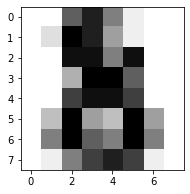

In [11]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?

A complete example of this classification problem is available as an example that you can run and study: Recognizing hand-written digits.

## Model persistence

It is possible to save a model in scikit-learn by using Python’s built-in persistence model, pickle:

In [12]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
clf.fit(X, y)

SVC()

In [13]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [14]:
y[0]

0

In the specific case of scikit-learn, it may be more interesting to use joblib’s replacement for pickle (joblib.dump & joblib.load), which is more efficient on big data but it can only pickle to the disk and not to a string:

In [15]:
from joblib import dump, load
dump(clf, 'filename.joblib') 

['filename.joblib']

Later, you can reload the pickled model (possibly in another Python process) with:

In [16]:
clf = load('filename.joblib') 

Note that pickle has some security and maintainability issues. Please refer to section Model persistence for more detailed information about model persistence with scikit-learn.

## Conventions

scikit-learn estimators follow certain rules to make their behavior more predictive. These are described in more detail in the [Glossary of Common Terms and API Elements](https://scikit-learn.org/stable/glossary.html#glossary).



### Type Casting

Unless otherwise specified, input will be cast to float64:

In [17]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [18]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In this example, X is float32, which is cast to float64 by fit_transform(X).

Regression targets are cast to float64 and classification targets are maintained:

In [19]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC()

In [20]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [21]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [22]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

Here, the first predict() returns an integer array, since iris.target (an integer array) was used in fit. The second predict() returns a string array, since iris.target_names was for fitting.

### Refitting and updating parameters

Hyper-parameters of an estimator can be updated after it has been constructed via the set_params() method. Calling fit() more than once will overwrite what was learned by any previous fit():

In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [24]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [25]:
clf.set_params(kernel='rbf').fit(X, y)

SVC()

In [26]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

Here, the default kernel rbf is first changed to linear via SVC.set_params() after the estimator has been constructed, and changed back to rbf to refit the estimator and to make a second prediction.

### Multiclass vs. multilabel fitting

When using multiclass classifiers, the learning and prediction task that is performed is dependent on the format of the target data fit upon:

In [27]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In the above case, the classifier is fit on a 1d array of multiclass labels and the predict() method therefore provides corresponding multiclass predictions. It is also possible to fit upon a 2d array of binary label indicators:

In [28]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

Here, the classifier is fit() on a 2d binary label representation of y, using the LabelBinarizer. In this case predict() returns a 2d array representing the corresponding multilabel predictions.

Note that the fourth and fifth instances returned all zeroes, indicating that they matched none of the three labels fit upon. With multilabel outputs, it is similarly possible for an instance to be assigned multiple labels:

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In this case, the classifier is fit upon instances each assigned multiple labels. The MultiLabelBinarizer is used to binarize the 2d array of multilabels to fit upon. As a result, predict() returns a 2d array with multiple predicted labels for each instance.